# Relatório de Análise 

In [ ]:
import pandas as pd
import os

diretorio = os.getcwd()
diretorio

In [ ]:
dados = pd.read_csv('aluguel.csv', sep= ';')
dados.info()

In [ ]:
dados

## Informações Gerais sobre a Base de Dados

In [ ]:
dados.dtypes

tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])

tipos_de_dados.columns.name = 'Variáveis'

tipos_de_dados

In [ ]:
dados.shape

# dados.shape[0]

# dados.shape[1]

In [ ]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis'.format(dados.shape[0], dados.shape[1]))

# Relatório de análise II 

#### tipos de imóveis 

In [ ]:
tipo_de_imovel = dados['Tipo']
tipo_de_imovel

In [ ]:
tipo_de_imovel.drop_duplicates(inplace = True)

tipo_de_imovel #me devolve uma series 

In [ ]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)


In [ ]:
tipo_de_imovel.index

In [ ]:
tipo_de_imovel.shape[0]

In [ ]:
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])

tipo_de_imovel.columns.name = 'Index'
pd.set_option('display.max_rows', 22)
tipo_de_imovel

# Relatório de análise III

### Imóveis residenciais 
#### Agora selecionar somente os imoveis que são residenciais

In [ ]:
dados

In [ ]:
#Ver todos os tipos de imoveis disponiveis 
list(dados['Tipo'].drop_duplicates())

In [ ]:
#Criando uma lista com os tipos que eu quero selecionar 
residencial = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']
residencial

In [ ]:
#Criando uma serie boleana para selecioar e criar um novo dataframe com os imoveis selecionados
selecao = dados['Tipo'].isin(residencial)

selecao

In [ ]:
#criando dataframe
dados_residencial = dados[selecao]

dados_residencial

In [ ]:
#confirmando que ficou só os dados selecionados
list(dados_residencial['Tipo'].drop_duplicates()) 

In [ ]:
#conferindo o tamanho 
dados_residencial.shape[0] 

In [ ]:
#reconstruir o index 
dados_residencial.index = range(dados_residencial.shape[0])

dados_residencial

# Exportando a base de dados

In [ ]:
dados_residencial.to_csv('aluguel_residencial.csv', sep= ';')

In [ ]:
teste = pd.read_csv('aluguel_residencial.csv', sep= ';')

In [ ]:
#o index foi exportado junto com os dados, criando esse erro na tabela
teste

In [ ]:
#Corringindo erro index, colocando como parametro o False 
dados_residencial.to_csv('aluguel_residencial.csv', sep= ';', index = False)

In [ ]:
#Erro corrigido
teste2 = pd.read_csv('aluguel_residencial.csv', sep= ';')

teste2

In [ ]:
dados_residencial

# Relatório de análise IV 
### Seleções e Frequências 

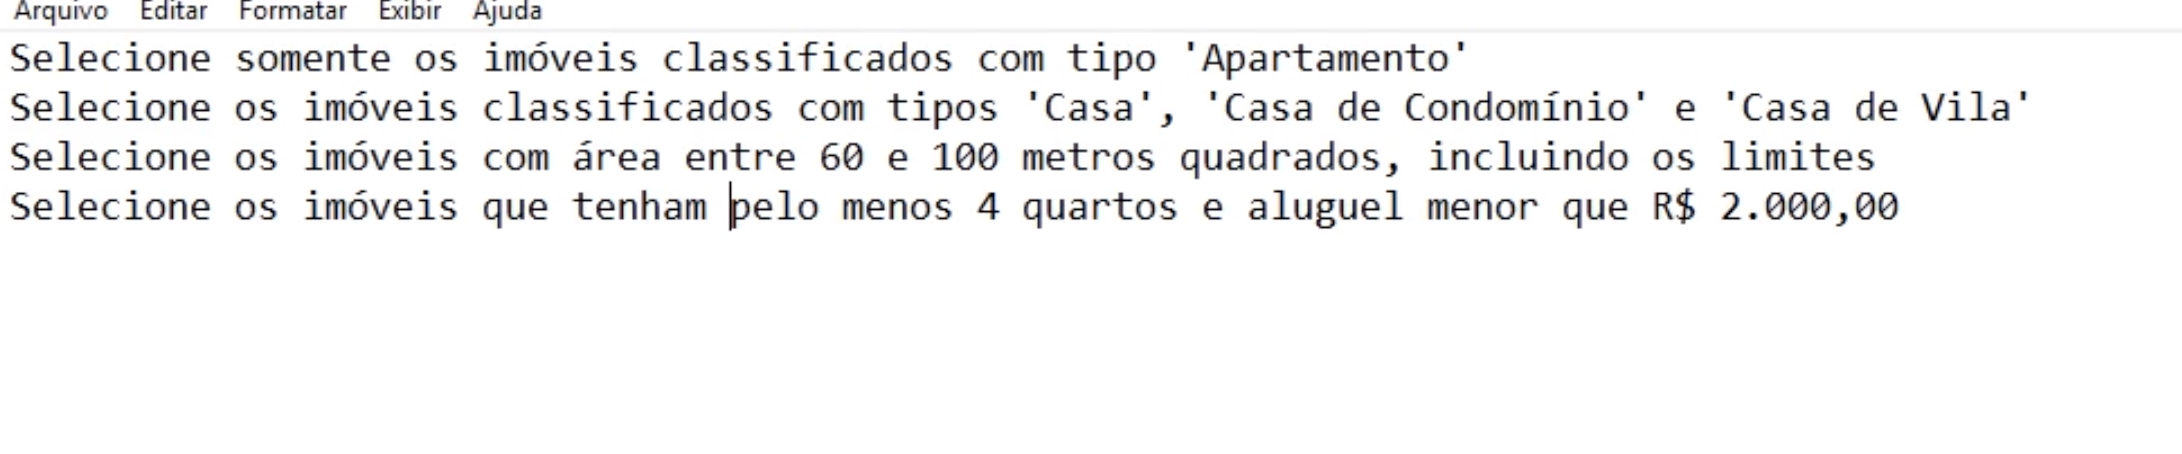

In [ ]:
#Selecionando os apartementos 
selecao = dados['Tipo'] == 'Apartamento'
selecao


In [ ]:
#Criando novo DF
df_apartamentos = dados[selecao]
df_apartamentos.index = range(df_apartamentos.shape[0])
df_apartamentos

In [ ]:
#Selecionando imoveis tipos casa, casa condominio, Casa de vila 

selecao = ((dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') 
           | (dados['Tipo'] =='Casa de Vila'))

df_casas = dados[selecao]
df_casas.index = range(df_casas.shape[0])

df_casas

In [ ]:
#Selecionando imoveis com área entre 60 e 100 m2, incluindo limites 
selecao = (dados_residencial['Area'] >= 60 ) & (dados_residencial['Area'] <= 100 )

area_60_100 = dados_residencial[selecao]
area_60_100.index = range(area_60_100.shape[0])

area_60_100

In [ ]:
#Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

selecao = (dados_residencial['Quartos'] >= 4  ) & (dados_residencial['Valor'] < 2000 )

quarto_aluguel = dados_residencial[selecao]
quarto_aluguel.index = range(quarto_aluguel.shape[0])

quarto_aluguel

# Relatório V
### Tratamento de dados faltantes 


In [ ]:
dados

In [ ]:
#conferindo os dados faltantes da coluna valor
dados[dados['Valor'].isnull()]

In [ ]:
#Tirando os dados faltantes achados 
A = dados.shape[0]
dados.dropna(subset= ['Valor'], inplace= True)
B = dados.shape[0]
A - B


In [ ]:
dados

In [ ]:
#Quantidade de valores nulos em condominos 
dados[dados['Condominio'].isnull()].shape[0]

In [ ]:
#Criando uma seleção com apertamento com condominio nulo para retirar do meu dataframe
selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull())

In [ ]:
#Retirando só os dados da seleção 
A = dados.shape[0]
dados = dados[~selecao] # o ~ serve para inverter e serie boleana, para retirar os dados da selecao
B = dados.shape[0]
A - B


In [ ]:
#trocando os valores nulos em condomino e IPTU
dados = dados.fillna({'Condominio': 0, 'IPTU': 0 })

In [ ]:
dados.to_csv('aluguel_sem_valor_nulo.csv', sep= ';', index= False)

In [ ]:
dados = pd.read_csv('aluguel_sem_valor_nulo.csv', sep= ';')

dados

# Relatório VI 
### Criando novas variáveis 

In [ ]:
residenciais = pd.read_csv('aluguel_residencial.csv', sep= ';')

In [ ]:

residenciais

In [ ]:
residenciais[residenciais['Valor'].isnull()].shape[0]


In [ ]:
#Tirando os dados faltantes achados 
A = residenciais.shape[0]
residenciais.dropna(subset= ['Valor'], inplace= True)
B = residenciais.shape[0]
A - B

In [ ]:
residenciais = residenciais.fillna({'Condominio': 0, 'IPTU': 0 })

In [ ]:
residenciais

In [ ]:
#Criando a variável do valor total a pagar 
residenciais['Valor Bruto'] = residenciais['Valor'] + residenciais['Condominio'] + residenciais['IPTU']

In [ ]:
residenciais

In [ ]:
#Valor do m2 
residenciais['Valor m2'] = residenciais['Valor'] / residenciais['Area']
residenciais['Valor m2'] = residenciais['Valor m2'].round(2) #Arredondar o valor 
residenciais

In [ ]:
#valor bruto do metro quadrado 
residenciais['Valor Bruto m2'] = (residenciais['Valor Bruto'] / residenciais['Area']).round(2)

residenciais

In [ ]:
residenciais.to_csv('aluguel_residencial.csv', sep= ';', index= False)

In [ ]:
residenciais.Tipo.unique()

In [ ]:
residenciais.Tipo.value_counts()

In [ ]:
residenciais.drop(['Valor Bruto'], axis= 1, inplace= True)

In [ ]:
residenciais.to_csv('aluguel_residencial.csv', sep= ';', index= False)

#  Relatório VII   
### Criando Agrupamentos 

In [ ]:
import pandas as pd

In [ ]:
residenciais = pd.read_csv('aluguel_residencial.csv', sep= ';')

In [ ]:
residenciais

In [ ]:
#selecionando só lugares com suite 
suite = residenciais['Suites'] >= 1
df_suite = residenciais[suite]
df_suite.index = range(df_suite.shape[0])
df_suite

In [ ]:
#Valor medio dos alugeis 
residenciais['Valor'].mean()

In [ ]:
residenciais.Bairro.unique()

In [ ]:
pd.set_option('display.max.rows', 200)
residenciais.Bairro.value_counts()

In [ ]:
bairros =  ['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Vista Alegre', 'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Praça Seca', 'Piedade', 'Lagoa', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Rocha Miranda', 'Engenho Novo', 'Engenho de Dentro',
       'Cidade Nova', 'Pilares', 'Tomás Coelho', 'Água Santa',
       'São Cristóvão', 'Ilha do Governador', 'Jardim Sulacap',
       'Oswaldo Cruz', 'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque',
       'Vaz Lobo', 'Madureira', 'São Francisco Xavier', 'Pechincha',
       'Leme', 'Irajá', 'Quintino Bocaiúva', 'Urca', 'Penha',
       'Gardênia Azul', 'Rio Comprido', 'Andaraí', 'Santa Teresa',
       'Inhaúma', 'Marechal Hermes', 'Curicica', 'Santíssimo', 'Moneró',
       'Jardim Guanabara', 'Camorim', 'Cascadura', 'Praia da Bandeira',
       'Saúde', 'Joá', 'Colégio', 'Guadalupe', 'Realengo', 'Fátima',
       'Inhoaíba', 'Rocha', 'Jabour', 'Braz de Pina',
       'Vicente de Carvalho', 'Praça da Bandeira', 'Vila Kosmos',
       'Encantado', 'Campinho', 'Ricardo de Albuquerque', 'Guaratiba',
       'Riachuelo', 'Bangu', 'Lapa', 'Catumbi', 'Penha Circular',
       'Parque Anchieta', 'Abolição', 'Pavuna', 'Santa Cruz',
       'Alto da Boa Vista', 'Bento Ribeiro', 'Estácio', 'Jardim América',
       'Cordovil', 'Caju', 'Pedra de Guaratiba', 'Padre Miguel',
       'Paciência', 'Del Castilho', 'Arpoador', 'Sampaio', 'Anchieta',
       'Icaraí', 'Senador Vasconcelos', 'Gamboa', 'Maria da Graça',
       'Barra de Guaratiba', 'Paquetá', 'Largo do Machado',
       'Parada de Lucas', 'Turiaçu', 'Freguesia (Ilha do Governador)',
       'Portuguesa', 'Honório Gurgel', 'Santo Cristo', 'Pitangueiras',
       'Vila Militar', 'Vidigal', 'Senador Camará', 'Usina',
       'Vigário Geral', 'Cosmos', 'Jacaré', 'Cocotá', 'Engenho da Rainha',
       'Cachamorra', 'Zumbi', 'Tauá', 'Ribeira', 'Magalhães Bastos',
       'Cacuia', 'Bancários', 'Cavalcanti', 'Rio da Prata',
       'Cidade Jardim', 'Coelho Neto', 'Grumari']

In [ ]:
select = residenciais['Bairro'].isin(bairros)
residenciais = residenciais[select]

In [ ]:
grupo_bairro = residenciais.groupby('Bairro')

grupo_bairro

In [ ]:
grupo_bairro.groups

In [ ]:
#dataframe de medias dos valores de aluguel e condominio 
grupo_bairro[['Valor', 'Condominio']].mean().round(2)


In [ ]:
media_aluguel = pd.DataFrame(grupo_bairro[['Valor', 'Condominio']].mean().round(2))

In [ ]:
media_aluguel

In [ ]:
grupo_bairro['Valor'].describe().round(2)

In [ ]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (20, 10))
fig = grupo_bairro['Valor'].mean().plot.bar()
fig.set_ylabel('Valor do Aluguel')
# fig.set_title ('Valor sahsadj', {'fontsize' : 22}) 

# Removento outliers  

In [9]:
import pandas as pd

residenciais = pd.read_csv('aluguel_residencial.csv', sep= ';')

residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14
...,...,...,...,...,...,...,...,...,...,...
22566,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86
22567,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63
22568,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08
22569,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17


In [10]:
#box plot 
residenciais.boxplot(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

In [11]:
residenciais[residenciais['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
7888,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77
11004,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98
13090,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67
14316,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03
16047,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00


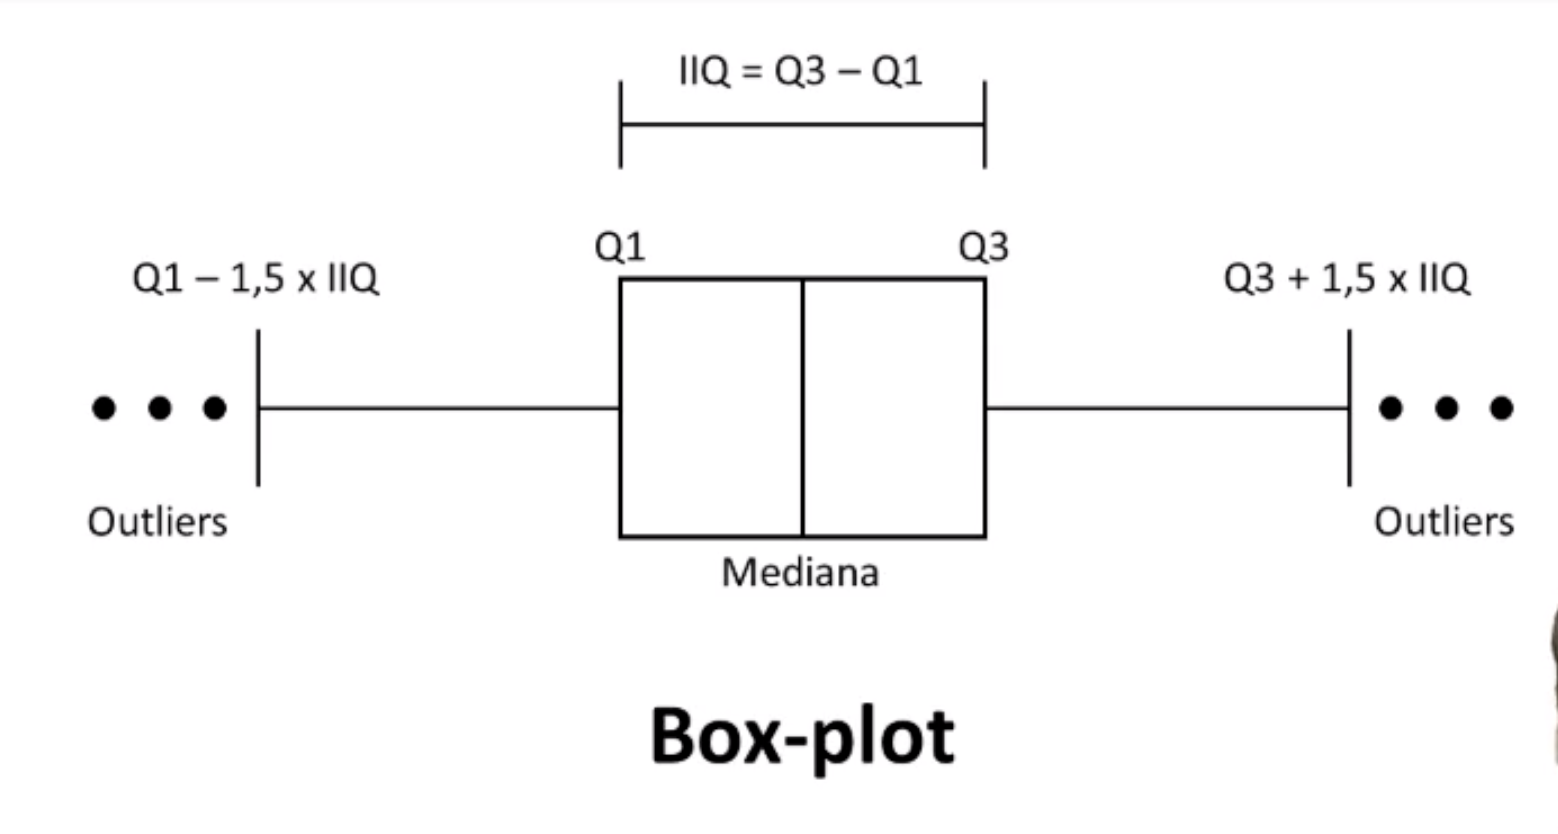

In [12]:
valor = residenciais['Valor']

valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1200.0
          ...  
22566     900.0
22567     800.0
22568    1800.0
22569    1400.0
22570    3000.0
Name: Valor, Length: 22571, dtype: float64

In [13]:
#Boxplot - removendo outliers 
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [14]:
selecao = (valor >- limite_inferior) & (valor <= limite_superior)

dados_new = residenciais[selecao]